In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


In [ ]:
url="https://raw.githubusercontent.com/dsrscientist/dataset1/master/winequality-red.csv"
df=pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
#Checking the missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
#Found no missing values in the dataset

In [ ]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


All columns are the numerical types

In [ ]:
#Statastical measure of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


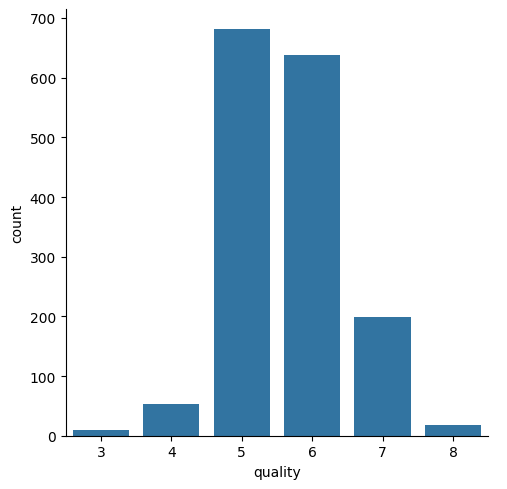

In [ ]:
#number of values for each quality
sns.catplot(x="quality",data=df,kind="count")

In summary, most wines in the dataset are rated average to slightly above average, with very few wines at the extreme low or high ends of the quality scale.

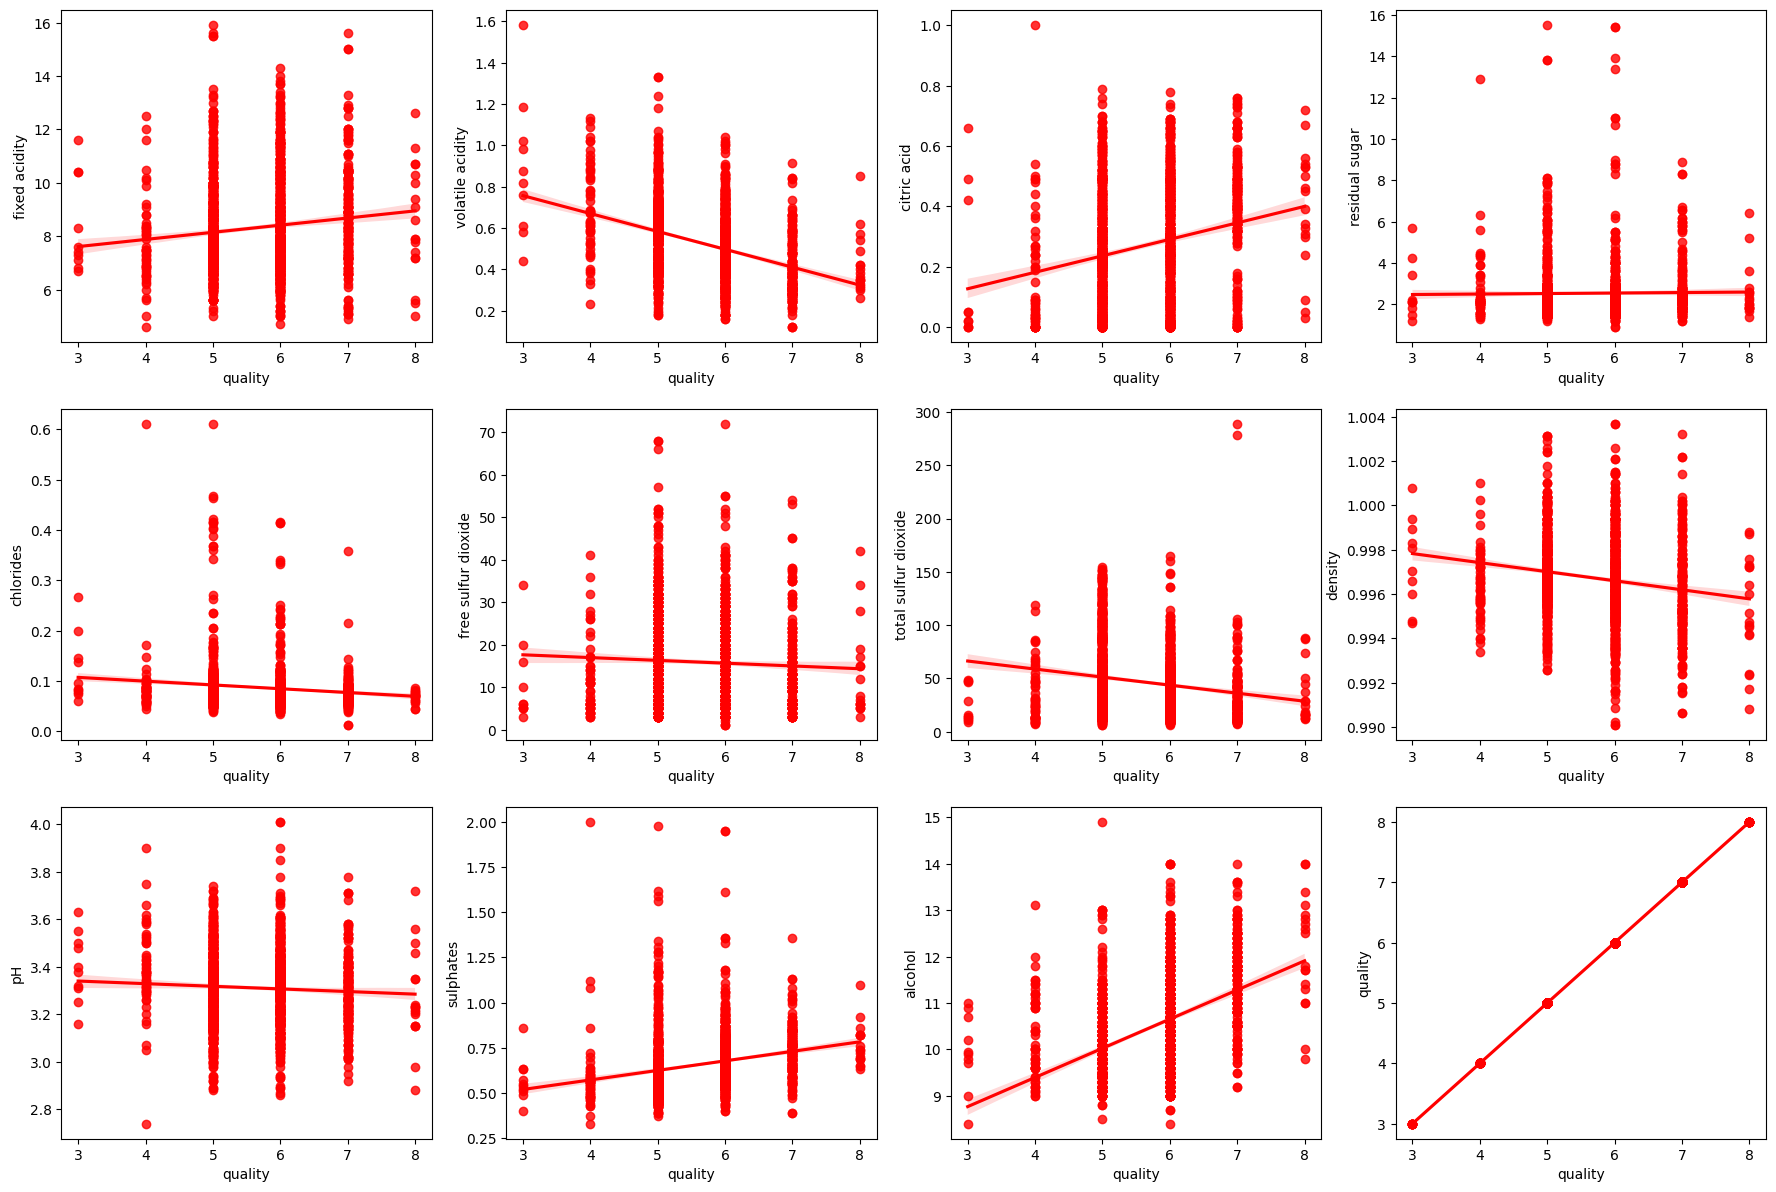

In [ ]:
plt.figure(figsize=(22,25))
p=1
for i in df:
  if p<=17:
    plt.subplot(5,4,p)
    sns.regplot(x="quality",y=i,data=df,color='r')
    plt.xlabel("quality")
    plt.ylabel(i)
  p=p+1
plt.show()

Key Insights:
Volatile acidity and total sulfur dioxide have a negative impact on quality.
Alcohol content shows a strong positive correlation with quality.
Other attributes like citric acid, sulphates, and fixed acidity have slight positive effects, while chlorides and density show a slight negative impact.

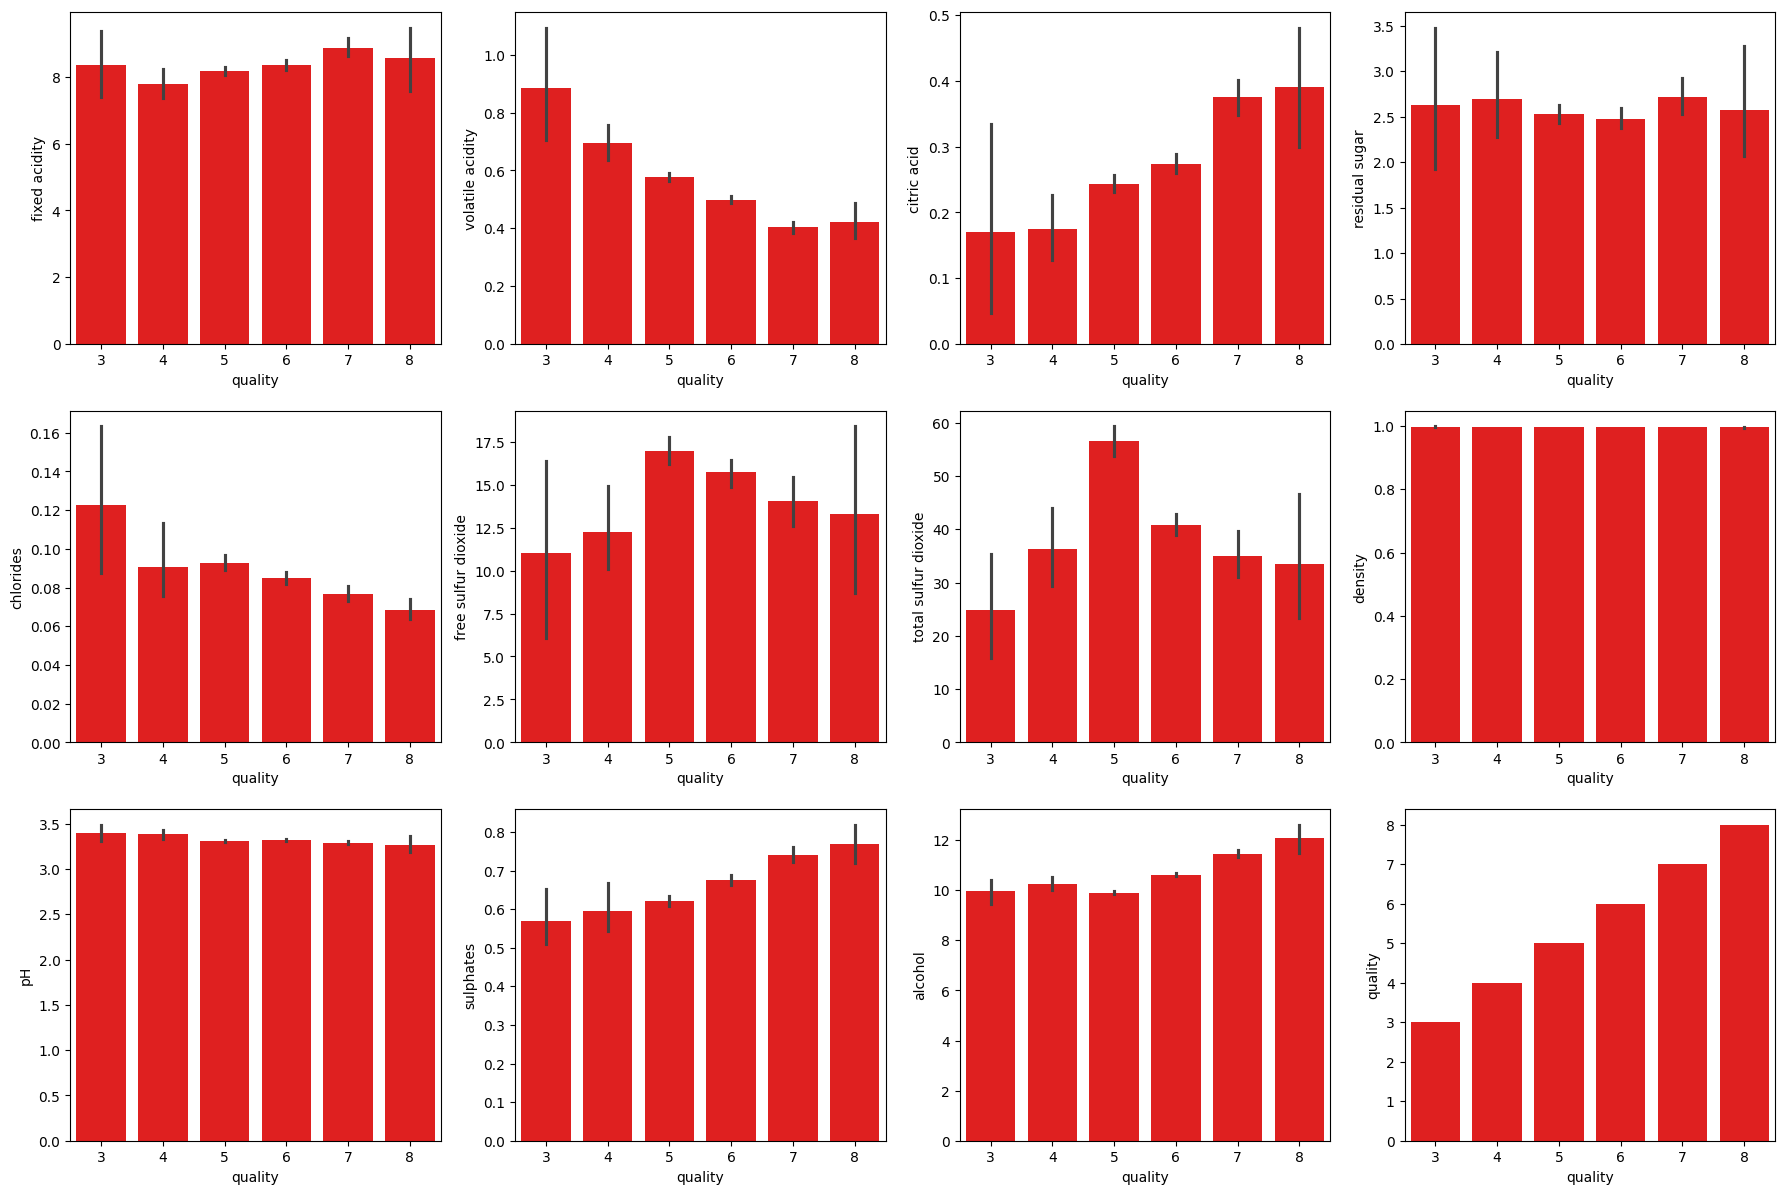

In [ ]:
#check wth bar plot
plt.figure(figsize=(22,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.barplot(x="quality", y=i, data=df, color='r')  # ci=None removes the confidence interval
        plt.xlabel("quality")
        plt.ylabel(i)
    p = p + 1
plt.show()


<Axes: >

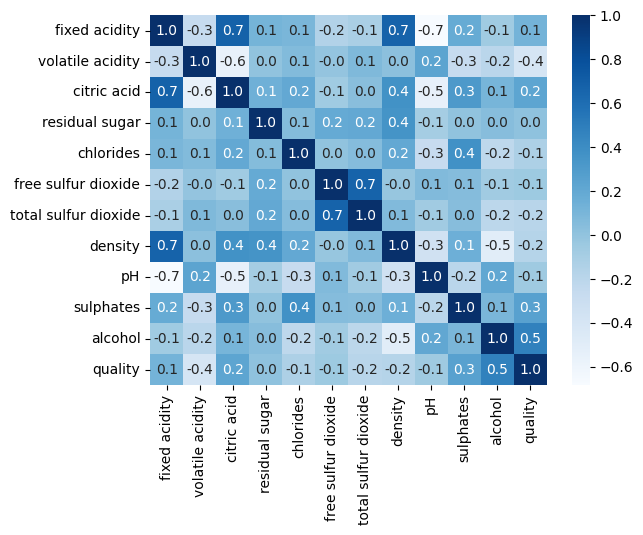

In [ ]:
#Correaltion between the columns
sns.heatmap(df.corr(),cbar=True,annot=True,fmt='.1f',cmap="Blues",)

Overall, the heatmap helps identify how various features affect the quality of the wine and the relationships between other variables. The brighter areas indicate stronger positive correlations, while the darker areas represent stronger negative correlations.


Ex:Alcohol vs. Quality:

Correlation: 0.5 (Positive correlation)
Wine quality improves with an increase in alcohol content.
Volatile Acidity vs. Quality:

Correlation: -0.4 (Negative correlation)
Higher volatile acidity is associated with lower wine quality.

In [ ]:
#Dapa preprocessing
x=df.drop("quality",axis=1)
y=df["quality"]


In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [ ]:
#As suggested in the problem statement conver the less than 7 in target variuable is 0 greated thatn 7 is 1
y=df["quality"].apply(lambda y_value:1 if y_value>=7 else 0)


In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
#count the 0' and 1s
y.value_counts()

,count
quality,
0,1382
1,217


In [ ]:
#Train test spli
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)


In [ ]:
y.shape


(1599,)

In [ ]:
y_train.shape

(1279,)

In [ ]:
y_test.shape

(320,)

Model building


In [ ]:

RFR=RandomForestClassifier()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_RFR_train = RFR.predict(x_train)
print(RFR)
print("accuracy score",accuracy_score(y_test,pred_RFR))
print("R score",r2_score(y_test,pred_RFR))
print("R score on trained data",r2_score(y_train,pred_RFR_train)*100)
print("Mean squared error",mean_squared_error(y_test,pred_RFR))
print("Mean absolte  error",mean_absolute_error(y_test,pred_RFR))

RandomForestClassifier()
accuracy score 0.940625
R score 0.41934867729920744
R score on trained data 100.0
Mean squared error 0.059375
Mean absolte  error 0.059375


Overall, the metrics show the model is performing well on the training data but might need further tuning to improve generalization to unseen data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import the KNeighborsClassifier model

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
pred_KNN_train = KNN.predict(x_train)
print(KNN)
print("accuracy score",accuracy_score(y_test,pred_KNN))
print("R score",r2_score(y_test,pred_KNN))
print("R score on trained data",r2_score(y_train,pred_KNN_train)*100)
print("Mean squared error",mean_squared_error(y_test,pred_KNN))
print("Mean absolte  error",mean_absolute_error(y_test,pred_KNN))

KNeighborsClassifier()
accuracy score 0.86875
R score -0.2835450291280679
R score on trained data 18.535031847133766
Mean squared error 0.13125
Mean absolte  error 0.13125


In [ ]:
from sklearn.tree import DecisionTreeRegressor # import the DecisionTreeRegressor class

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_dtr_train = dtr.predict(x_train)
print(dtr)
print("R score",r2_score(y_test,pred_dtr))
print("R score on trained data",r2_score(y_train,pred_dtr_train)*100)
print("Mean squared error",mean_squared_error(y_test,pred_dtr))
print("Mean absolte  error",mean_absolute_error(y_test,pred_dtr))

DecisionTreeRegressor()
R score 0.11374271798300073
R score on trained data 100.0
Mean squared error 0.090625
Mean absolte  error 0.090625


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor # import the GradientBoostingRegressor class

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_GBR_train = GBR.predict(x_train)
print(GBR)
print("accuracy score",accuracy_score(y_test,pred_KNN))
print("R score",r2_score(y_test,pred_GBR))
print("R score on trained data",r2_score(y_train,pred_GBR_train)*100)
print("Mean squared error",mean_squared_error(y_test,pred_GBR))
print("Mean absolte  error",mean_absolute_error(y_test,pred_GBR))

GradientBoostingRegressor()
accuracy score 0.86875
R score 0.4210064247559965
R score on trained data 63.98459823502469
Mean squared error 0.059205485609179306
Mean absolte  error 0.13484825170948372


Best Performing Model:
RandomForestClassifier:

Highest accuracy score: 94.06% – It has the highest classification accuracy.
R² score (test data): 0.419 – It explains 41.9% of the variance in the target variable on test data, which is tied with GradientBoostingRegressor.
Lowest errors: MSE = 0.059 and MAE = 0.059 – These values indicate that the RandomForestClassifier has the smallest prediction errors.

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_lr_train = lr.predict(x_train)
print(lr)
print("R score",r2_score(y_test,pred_lr))
print("R score on trained data",r2_score(y_train,pred_lr_train)*100)
print("Mean squared error",mean_squared_error(y_test,pred_lr))
print("Mean absolte  error",mean_absolute_error(y_test,pred_lr))

LinearRegression()
R score 0.24666522898685606
R score on trained data 23.82655153642893
Mean squared error 0.07703289440701788
Mean absolte  error 0.19339477644845487


In [ ]:
#Now we have do cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("Difference between R2 socre and croos validation score is",(r2_score(y_test,pred_lr)-score.mean())*100)

[ 0.0806345   0.21721563  0.30973625  0.22559246 -0.01409383]
0.16381700048302472
Difference between R2 socre and croos validation score is 8.284822850383133


In [ ]:
input_data=(10.5,0.42,0.66,2.95,0.11599999999999999,12.0,29.0,0.997,3.24,0.75,11.7)
#Converting the inout data into numpy array
input_data_numpy=np.asarray(input_data)
#Reshape the data as we are predictring the label for on instance
input_data_reshaped=input_data_numpy.reshape(1,-1)
prediction=RFR.predict(input_data_reshaped)
print(prediction)
if prediction[0]==1:
  print("Good quality wine")
else:
    print("bad quality")


[1]
Good quality wine


[1]
